In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
plt.rcParams['figure.figsize'] = 7,7
plt.rcParams['axes.linewidth'] = 2.0
plt.rcParams['savefig.dpi'] = 500
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [3]:
# Create dictionary list
os.chdir("/home/cadeniran/storage/cadeniran/mpp/amphiscan-pep/results_grid")

pert_incre=[]
for subdir in os.listdir("."):
    pert_incre.append(subdir)

In [4]:
# Load data w/ dictionary to hold the DataFrames
data=[]
df_collection = {}

for i in range(len(pert_incre)):
    os.chdir("/home/cadeniran/storage/cadeniran/mpp/amphiscan-pep/results_grid/"+pert_incre[i])
    data = pd.read_csv("rmsd_values.csv", header=None, sep=',', engine='python', names=['ID', 'RMSD', 'z_increment', 'pert_num'])
    df_collection[pert_incre[i]] = pd.DataFrame(data)

In [5]:
combined_dfs = pd.DataFrame({'0.3_45': df_collection["0.3_45"]["RMSD"],
                             '0.3_50': df_collection["0.3_50"]["RMSD"],
                             '0.4_35': df_collection["0.4_35"]["RMSD"],
                             '0.6_45': df_collection["0.6_45"]["RMSD"]})

## Plots

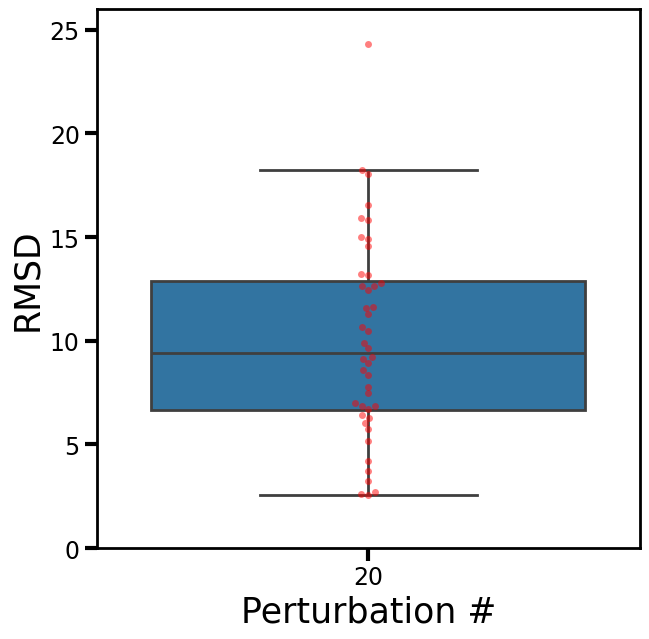

In [94]:
ax = sns.boxplot(x="pert_num", y="RMSD", data=df_collection["0.5_20"], showfliers = False, linewidth=2)
ax = sns.swarmplot(x="pert_num", y="RMSD", data=df_collection["0.5_20"], color="r", alpha=0.5)

ax.set_ylim([0, 26])
plt.xlabel("Perturbation #", fontsize=25)
plt.ylabel("RMSD", fontsize=25)
plt.tick_params(axis='both', labelsize='17', length=9, width=3)

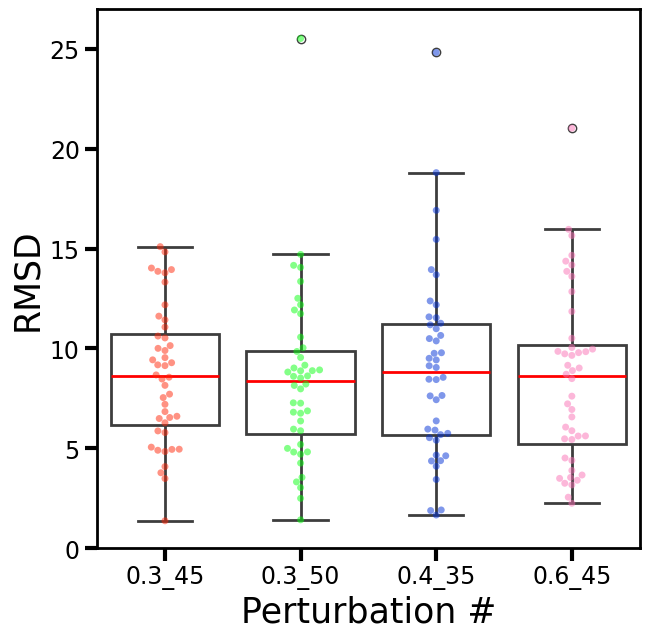

In [95]:
colors = ['#FF2709', '#09FF10', '#0030D7', '#FA70B5']

ax = sns.boxplot(data=combined_dfs, linewidth=2, color="white", medianprops=dict(color="red", alpha=1),)
ax = sns.swarmplot(data=combined_dfs, palette=colors, alpha=0.5)

ax.set_ylim([0, 27])
plt.xlabel("Perturbation #", fontsize=25)
plt.ylabel("RMSD", fontsize=25)
plt.tick_params(axis='both', labelsize='17', length=9, width=3)

#plt.show()
plt.savefig("/home/cadeniran/ipn/figs/boxplot4.png", transparent=True, bbox_inches='tight')